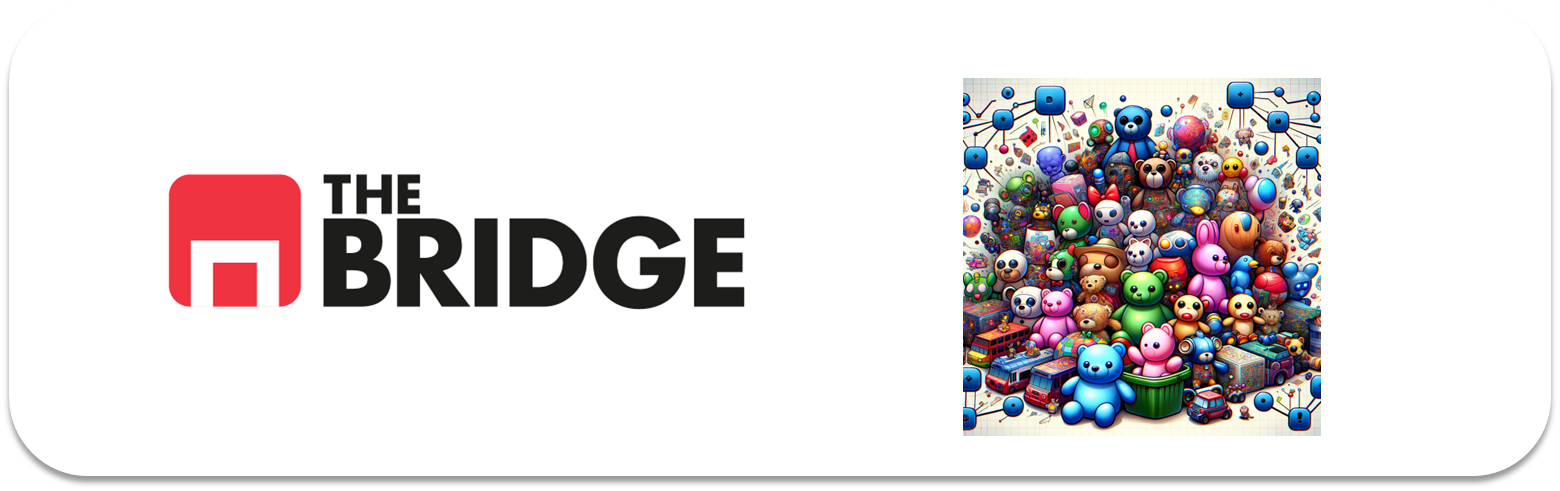

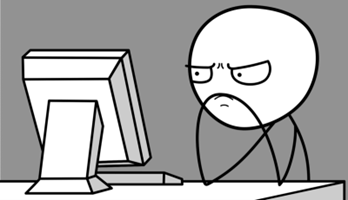

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn



## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [2]:
from sklearn.datasets import fetch_olivetti_faces

# Cargar el dataset de rostros Olivetti
data = fetch_olivetti_faces()
olivetti = fetch_olivetti_faces()

# Extraer las imágenes y las etiquetas
X = data.images
y = data.target

# Mostrar la forma de los datos
print(f'Forma de las imágenes: {X.shape}')
print(f'Forma de las etiquetas: {y.shape}')

Forma de las imágenes: (400, 64, 64)
Forma de las etiquetas: (400,)


In [3]:
pd.DataFrame(olivetti.data)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.388430,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.380165,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.194215,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.446281,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306


In [5]:
[f"pixel_{i}" for i in range(4096)]

['pixel_0',
 'pixel_1',
 'pixel_2',
 'pixel_3',
 'pixel_4',
 'pixel_5',
 'pixel_6',
 'pixel_7',
 'pixel_8',
 'pixel_9',
 'pixel_10',
 'pixel_11',
 'pixel_12',
 'pixel_13',
 'pixel_14',
 'pixel_15',
 'pixel_16',
 'pixel_17',
 'pixel_18',
 'pixel_19',
 'pixel_20',
 'pixel_21',
 'pixel_22',
 'pixel_23',
 'pixel_24',
 'pixel_25',
 'pixel_26',
 'pixel_27',
 'pixel_28',
 'pixel_29',
 'pixel_30',
 'pixel_31',
 'pixel_32',
 'pixel_33',
 'pixel_34',
 'pixel_35',
 'pixel_36',
 'pixel_37',
 'pixel_38',
 'pixel_39',
 'pixel_40',
 'pixel_41',
 'pixel_42',
 'pixel_43',
 'pixel_44',
 'pixel_45',
 'pixel_46',
 'pixel_47',
 'pixel_48',
 'pixel_49',
 'pixel_50',
 'pixel_51',
 'pixel_52',
 'pixel_53',
 'pixel_54',
 'pixel_55',
 'pixel_56',
 'pixel_57',
 'pixel_58',
 'pixel_59',
 'pixel_60',
 'pixel_61',
 'pixel_62',
 'pixel_63',
 'pixel_64',
 'pixel_65',
 'pixel_66',
 'pixel_67',
 'pixel_68',
 'pixel_69',
 'pixel_70',
 'pixel_71',
 'pixel_72',
 'pixel_73',
 'pixel_74',
 'pixel_75',
 'pixel_76',
 'pixel_7

In [6]:
df_olivetti = pd.DataFrame(olivetti.data, columns = [f"pixel_{i}" for i in range(4096)])
df_olivetti

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4086,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.388430,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.380165,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.194215,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.446281,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306


In [7]:
df_olivetti["cara"]=olivetti.target

In [8]:
df_olivetti_back = df_olivetti.copy()

In [9]:
train_val, test_set = train_test_split(df_olivetti, test_size = 48, stratify= df_olivetti ["cara"], random_state= 42) #
train set, validation_set = train_test_split(train_val, test_size = 80, stratify= train_val["cara"], random_state= 43)

SyntaxError: invalid syntax (1721558776.py, line 2)

In [32]:
X[0]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [7]:

# Mostrar el target
print(f'Target: {y}')

# Aplanar las imágenes para convertirlas en un DataFrame
X_flat = X.reshape((X.shape[0], -1))

# Crear un DataFrame con las imágenes y el target
df = pd.DataFrame(X_flat)
df['target'] = y

# Reordenar aleatoriamente las imágenes en el DataFrame
df_shuffled = df.sample(frac=1).reset_index(drop=True)

# Mostrar las primeras filas del DataFrame reordenado
print(df_shuffled.head())

Target: [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 

In [33]:
X_flat[0]

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [9]:
from sklearn.model_selection import train_test_split

# Realizar el primer split 90-10 para obtener el conjunto de entrenamiento y un conjunto temporal
df_train, df_temp = train_test_split(df_shuffled, test_size=0.2, stratify=df_shuffled['target'], random_state=42)

# Realizar el segundo split 89-11 sobre el conjunto temporal para obtener los conjuntos de validación y prueba
df_val, df_test = train_test_split(df_temp, test_size=0.5, stratify=df_temp['target'], random_state=42)

# Mostrar el tamaño de cada conjunto
print(f'Tamaño del conjunto de entrenamiento: {df_train.shape}')
print(f'Tamaño del conjunto de validación: {df_val.shape}')
print(f'Tamaño del conjunto de prueba: {df_test.shape}')

Tamaño del conjunto de entrenamiento: (320, 4097)
Tamaño del conjunto de validación: (40, 4097)
Tamaño del conjunto de prueba: (40, 4097)


### #1.4

Crea los pares X,y para train, validation y test.

In [34]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y las etiquetas (y) para el conjunto de entrenamiento
X_train = df_train.drop(columns=['target'])
y_train = df_train['target']

# Separar las características (X) y las etiquetas (y) para el conjunto de validación
X_val = df_val.drop(columns=['target'])
y_val = df_val['target']

# Separar las características (X) y las etiquetas (y) para el conjunto de prueba
X_test = df_test.drop(columns=['target'])
y_test = df_test['target']

# Mostrar el tamaño de cada conjunto
print(f'Tamaño de X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Tamaño de X_val: {X_val.shape}, y_val: {y_val.shape}')
print(f'Tamaño de X_test: {X_test.shape}, y_test: {y_test.shape}')

Tamaño de X_train: (320, 4096), y_train: (320,)
Tamaño de X_val: (40, 4096), y_val: (40,)
Tamaño de X_test: (40, 4096), y_test: (40,)


Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [37]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

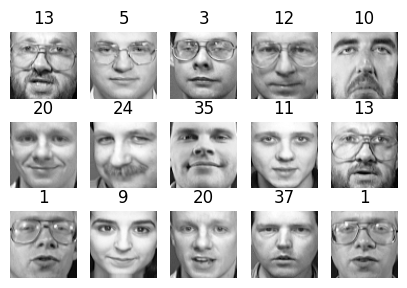

In [38]:
# Visualizar algunas de las caras del conjunto de entrenamiento
plot_faces(X_train.values[:15], y_train.values[:15])

### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [39]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir la dimensionalidad, manteniendo el 99% de la varianza
pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Mostrar el número de componentes principales seleccionados
print(f'Número de componentes principales: {pca.n_components_}')

Número de componentes principales: 219


### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

El mejor k es: 110
El mejor score de silueta es: 0.1892


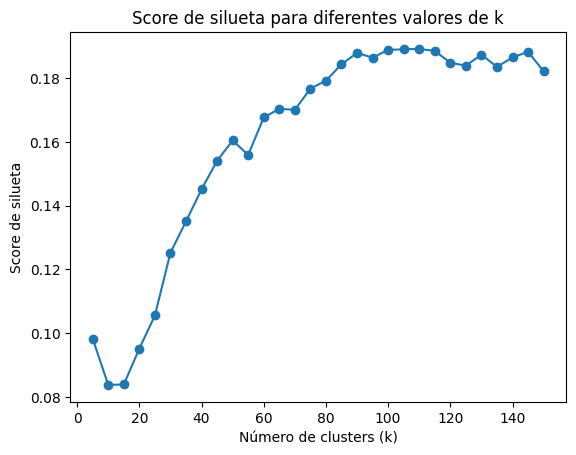

In [41]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Definir una función para calcular el score de silueta para diferentes valores de k
def find_best_k(X, k_range):
    best_k = 0
    best_score = -1
    scores = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append(score)
        
        if score > best_score:
            best_score = score
            best_k = k
    
    return best_k, best_score, scores

# Definir el rango de k a probar
k_range = range(5, 151, 5)

# Encontrar el mejor k basado en el score de silueta
best_k, best_score, scores = find_best_k(X_train, k_range)

# Mostrar el mejor k y el mejor score de silueta
print(f'El mejor k es: {best_k}')
print(f'El mejor score de silueta es: {best_score:.4f}')

# Graficar los scores de silueta para diferentes valores de k
plt.plot(k_range, scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Score de silueta')
plt.title('Score de silueta para diferentes valores de k')
plt.show()


### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

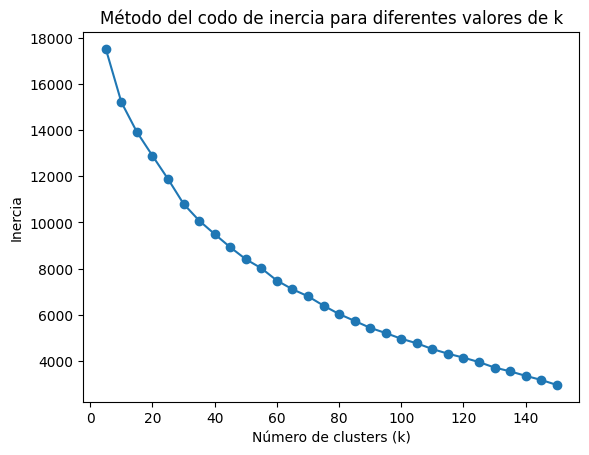

In [43]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Definir una función para calcular la inercia para diferentes valores de k
def calculate_inertia(X, k_range):
    inertias = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    
    return inertias

# Definir el rango de k a probar
k_range = range(5, 151, 5)

# Calcular la inercia para diferentes valores de k
inertias = calculate_inertia(X_train, k_range)

# Graficar las inercias para visualizar el codo
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo de inercia para diferentes valores de k')
plt.show()

### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [42]:
best_model=110

### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?


Cluster 0


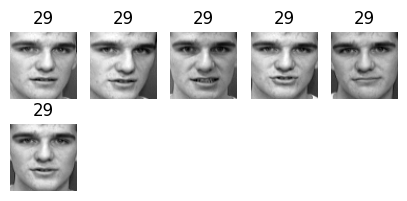

Cluster 1


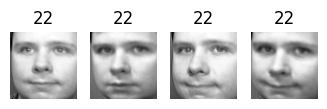

Cluster 2


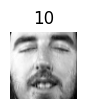

Cluster 3


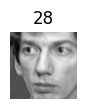

Cluster 4


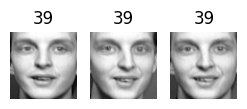

Cluster 5


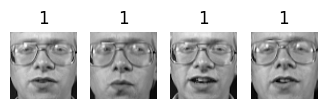

Cluster 6


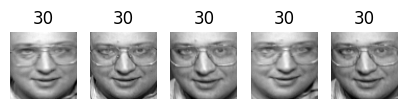

Cluster 7


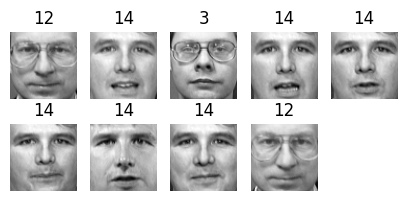

Cluster 8


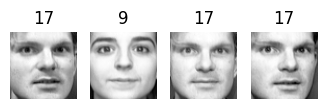

Cluster 9


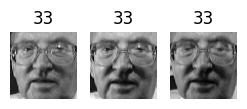

Cluster 10


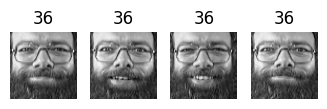

Cluster 11


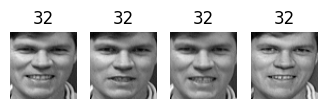

Cluster 12


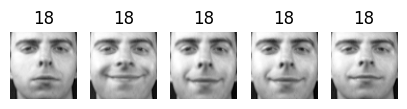

Cluster 13


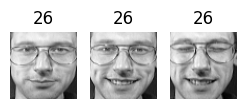

Cluster 14


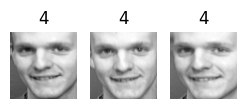

In [44]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Definir la función para visualizar las caras
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

# Entrenar el modelo K-Means con el mejor k
best_k = 110  # Reemplaza con el valor de best_k encontrado anteriormente
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_train)

# Obtener las etiquetas de los clusters para los datos de entrenamiento
labels = kmeans.labels_

# Visualizar las caras asignadas a los 10 primeros clusters
for cluster in range(15):
    cluster_faces = X_train[labels == cluster]
    cluster_labels = y_train[labels == cluster]
    print(f'Cluster {cluster}')
    plot_faces(cluster_faces.values[:15], cluster_labels.values[:15])

## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Entrenar el modelo RandomForest con 150 estimadores
rf_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rf_clf.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de validación
y_val_pred = rf_clf.predict(X_val)

# Evaluar el modelo en el conjunto de validación
accuracy = accuracy_score(y_val, y_val_pred)

# Mostrar la precisión del modelo
print(f'Precisión del modelo RandomForest en el conjunto de validación: {accuracy:.4f}')

Precisión del modelo RandomForest en el conjunto de validación: 0.9750


### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)